In [1]:
from transformers import ViTImageProcessor
from utils import download_imagenet_labels, overlay, plot_auc_line
import time
from PIL import Image
from mutex import MUTEX

2024-04-02 13:02:05.202338: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Parameters

In [2]:
# Image processor for ViT model (only used for resizing image during the plot)
resizer = ViTImageProcessor(do_rescale=False, do_normalize=False)

# URL to download ImageNet labels
imagenet_labels_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
class_labels = download_imagenet_labels(imagenet_labels_url)
class_labels_lower = [cls.lower() for cls in class_labels]
imagenet_label_dict = {index: label for index, label in enumerate(class_labels)}

In [3]:
# Minimum attention % cut-off
min_cut = 0.01

# Token ratio for saliency calculation
token_ratio = 0.5

# Starting layer for saliency calculation
starting_layer = 0

# ViT

In [4]:
# Initialize MUTEX model for ViT
model_vit = MUTEX('vit', 'cuda:0')

## Single Image Plot

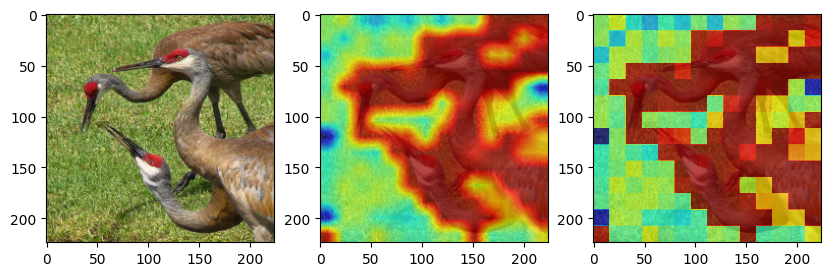

In [5]:
img_path = '../Example_imgs/crane.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_vit.get_saliency(img_path, min_cut, token_ratio, starting_layer)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [6]:
# Paths to images
img_paths = [
    '../Example_imgs/ILSVRC2012_val_00042426.jpg',
    '../Example_imgs/ILSVRC2012_val_00008598.jpg',
    '../Example_imgs/ILSVRC2012_val_00026910.jpg'
]

# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

Time taken: 0.5392477512359619


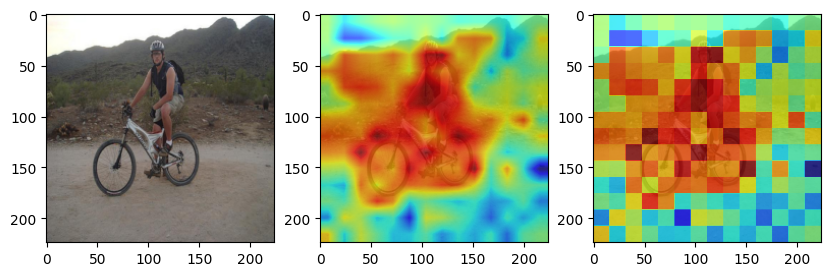

Time taken: 0.5356247425079346


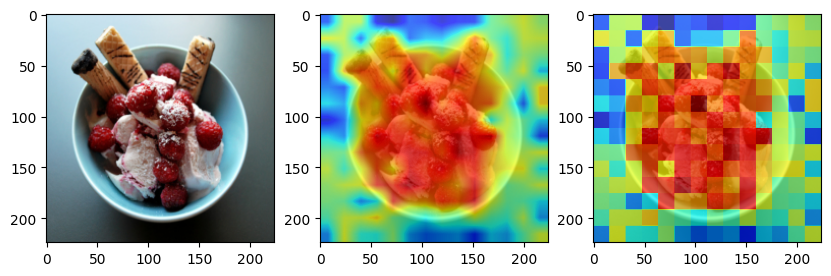

Time taken: 0.5333702564239502


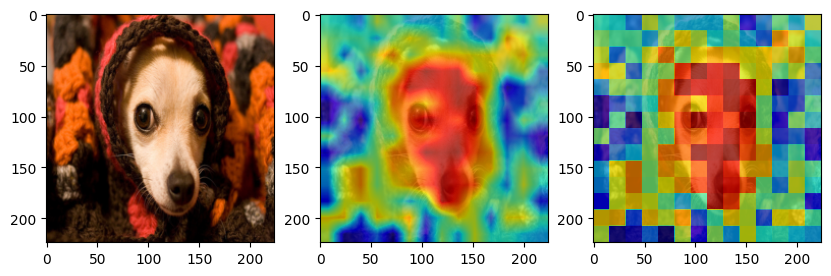

In [7]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model_vit.get_saliency(img_path, min_cut, token_ratio, starting_layer)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model_vit.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

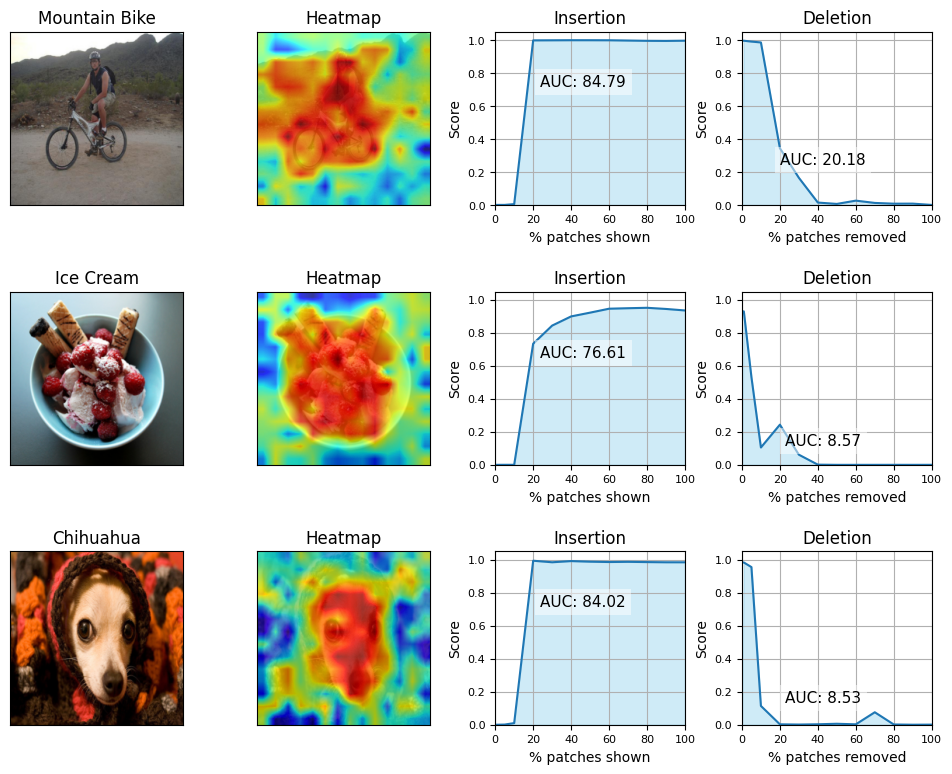

In [8]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, title = 'ViT', figsize_x = 12, alpha = 0.75)

# DeiT

In [9]:
# Initialize MUTEX model for DeiT
model_deit = MUTEX('deit', 'cuda:0')

## Single Image Plot

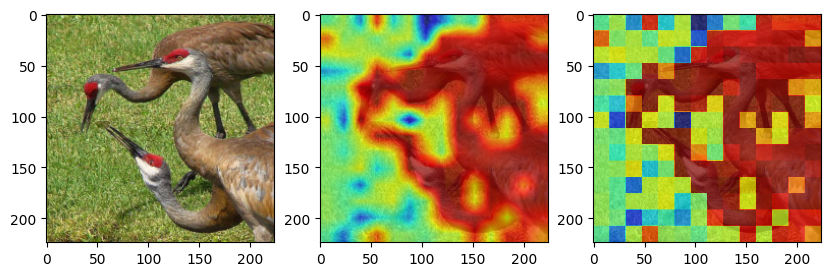

In [10]:
img_path = '../Example_imgs/crane.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_deit.get_saliency(img_path, min_cut, token_ratio, starting_layer)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [11]:
# Paths to images
img_paths = [
    '../Example_imgs/ILSVRC2012_val_00042426.jpg',
    '../Example_imgs/ILSVRC2012_val_00008598.jpg',
    '../Example_imgs/ILSVRC2012_val_00026910.jpg'
]

# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

Time taken: 0.5312440395355225


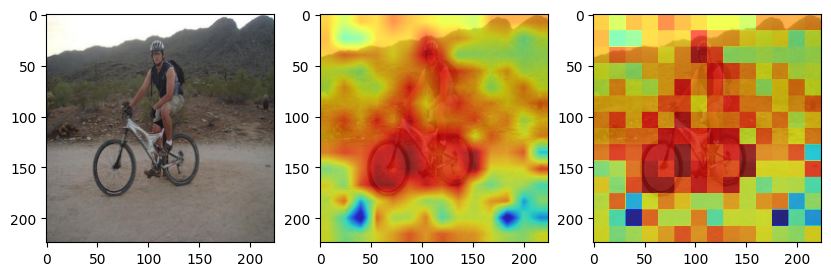

Time taken: 0.534245491027832


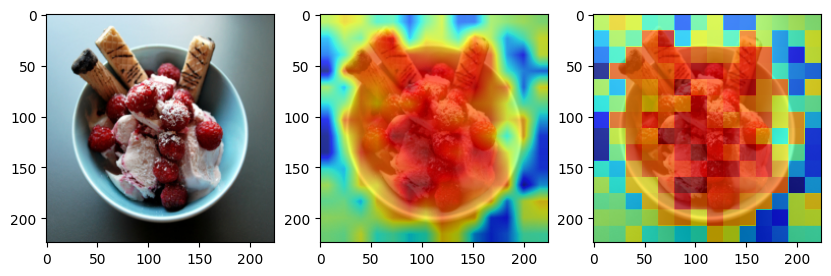

Time taken: 0.742241382598877


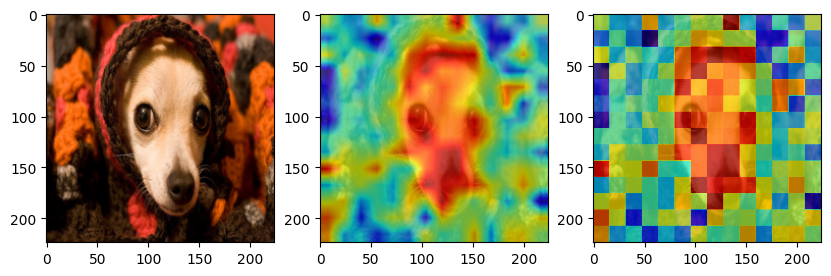

In [12]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model_deit.get_saliency(img_path, min_cut, token_ratio, starting_layer)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model_deit.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

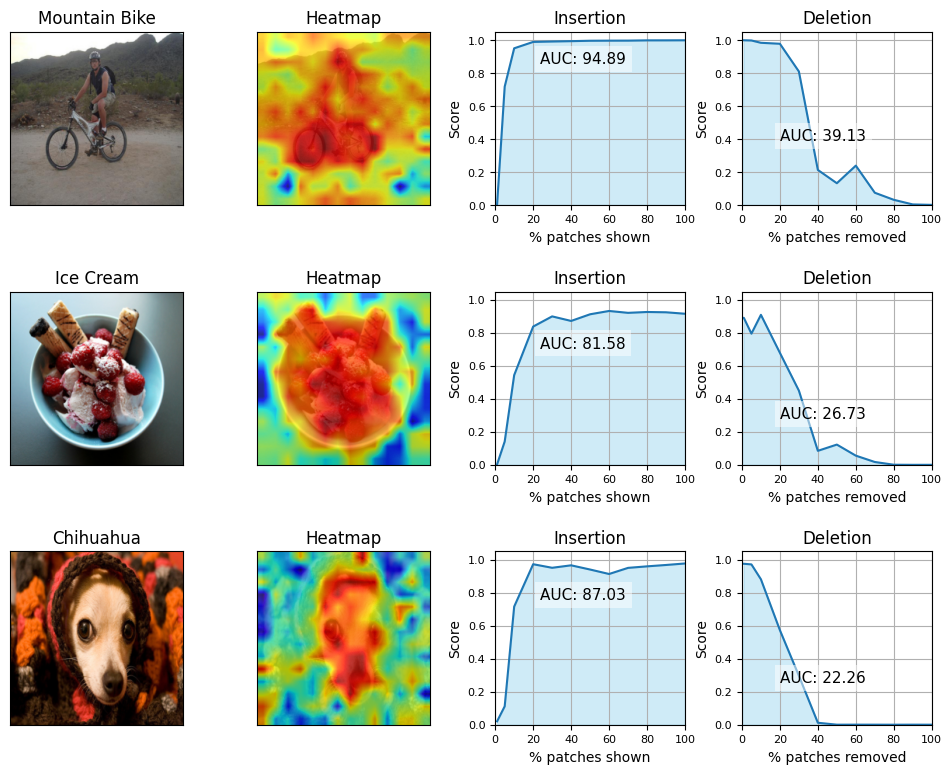

In [13]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, title = 'DeiT', figsize_x = 12, alpha = 0.75)